# Day 2 — Exploratory Data Analysis (EDA) on the Iris dataset

This notebook walks through a thorough EDA process using the classic Iris dataset.

Sections:
1. Setup & versions
2. Load dataset & quick inspection
3. Missing values & datatypes
4. Univariate analysis (distributions & outliers)
5. Bivariate analysis (scatter plots)
6. Correlation matrix & heatmap
7. PCA (2D) visualization

Each code cell includes comments and explanation so you can run this in Google Colab as-is.

---

## 1) Setup & library versions

We'll import the core libraries and print versions so you know what's running.

In [ ]:

# Imports & versions
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

print("Python:", sys.version.splitlines()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("scikit-learn:", sklearn_version)


Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
NumPy: 2.0.2
Pandas: 2.2.2
Matplotlib: 3.10.0
scikit-learn: 1.6.1


## 2) Load the Iris dataset

We'll load Iris from `sklearn.datasets`, convert it to a `pandas.DataFrame`, and add a human-readable target column.

In [ ]:

# Load Iris dataset from scikit-learn and convert to a pandas DataFrame
iris = load_iris()
X = iris['data']
y = iris['target']
feature_names = [fn.replace(' (cm)','').replace(' ','_') for fn in iris['feature_names']]
target_names = iris['target_names']

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: target_names[i])

# show first few rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 3) Quick inspection

We'll examine `head()`, `shape`, `info()`, `describe()`, and check for missing values. Basic checks help decide preprocessing steps.

In [ ]:

# Quick inspection: shape, datatypes, summary statistics, missing values
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nAny missing values?\n", df.isna().sum())

print("\nSummary statistics (numeric features):")
df.describe().T


Shape: (150, 6)

Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
target_name      object
dtype: object

Any missing values?
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
target_name     0
dtype: int64

Summary statistics (numeric features):


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## 4) Univariate analysis

We'll plot histograms and boxplots for each numeric feature to understand distributions and spot outliers.

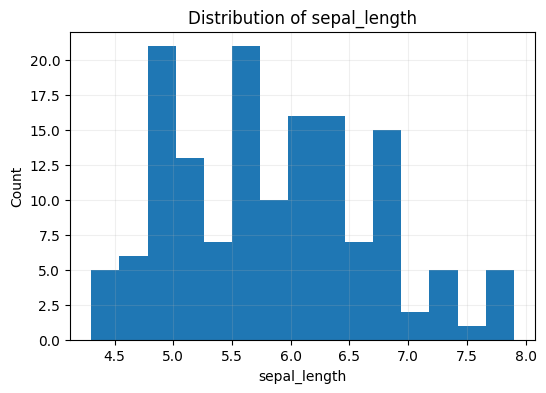

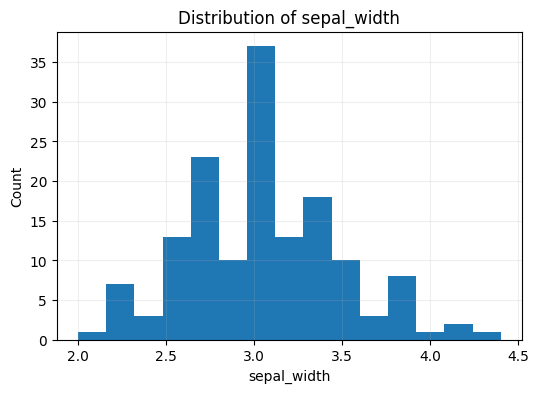

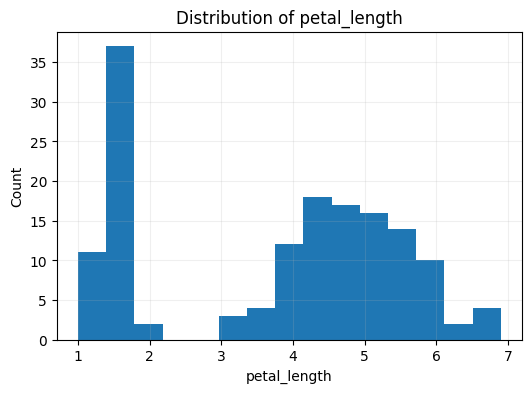

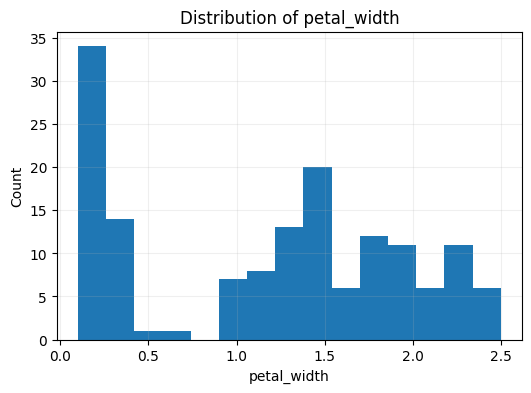

In [ ]:

# Univariate analysis - Histograms for each numeric feature
numeric_cols = feature_names

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=15)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(alpha=0.2)
    plt.show()


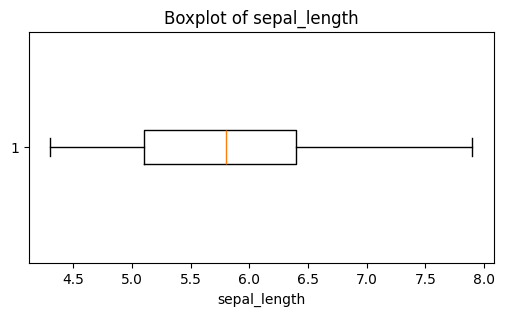

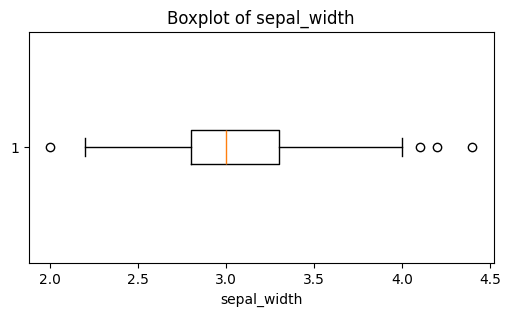

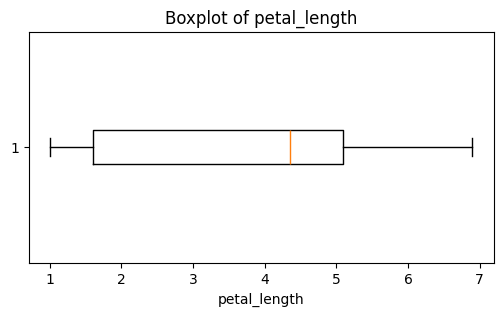

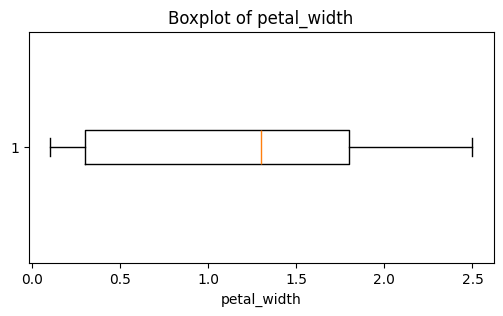

In [ ]:

# Boxplots for each numeric feature to inspect outliers (one figure per feature)
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


## 5) Bivariate analysis

We'll create a few targeted scatter plots (each its own figure) to inspect relationships that may separate classes.

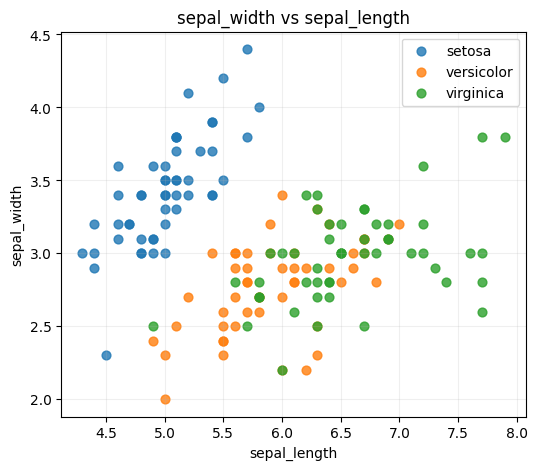

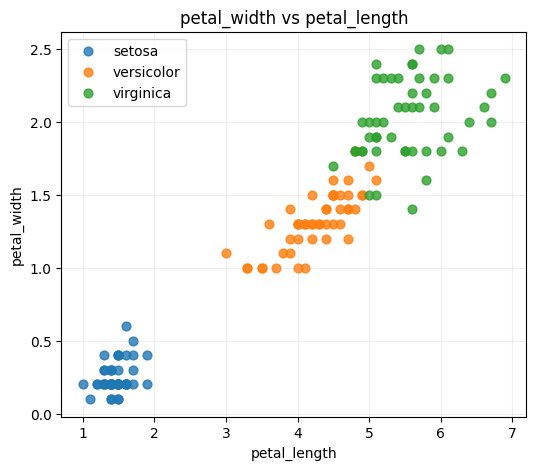

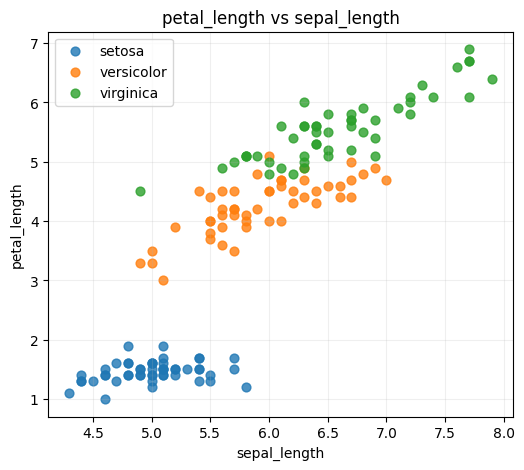

In [ ]:

# Bivariate analysis - targeted scatter plots (each its own figure)
pairs = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_length', 'petal_length')
]

for xcol, ycol in pairs:
    plt.figure(figsize=(6,5))
    for target_idx, target_name in enumerate(target_names):
        subset = df[df['target'] == target_idx]
        plt.scatter(subset[xcol], subset[ycol], label=target_name, s=40, alpha=0.8)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"{ycol} vs {xcol}")
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()


## 6) Correlation matrix & heatmap

We'll compute Pearson correlations and visualize them with `matplotlib.imshow` (a single-figure heatmap).

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


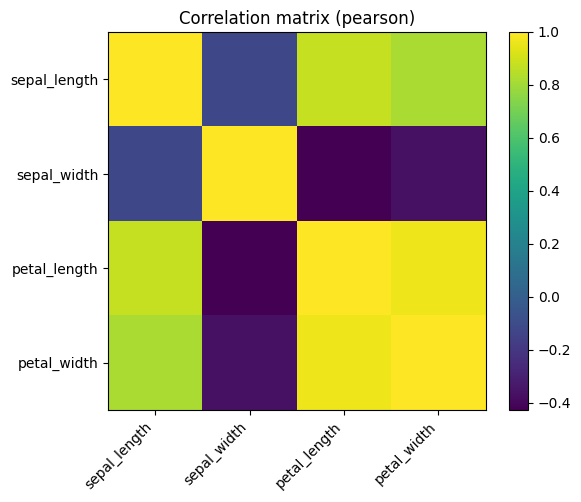

In [ ]:

# Correlation matrix (Pearson) - numeric features only
corr = df[numeric_cols].corr()
print(corr)
# Simple heatmap using matplotlib (single figure)
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation matrix (pearson)")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()


## 7) PCA 2D visualization

We'll reduce to 2 principal components and visualize how classes separate in this lower-dimensional space.

Explained variance ratio (PC1, PC2): [0.92461872 0.05306648]


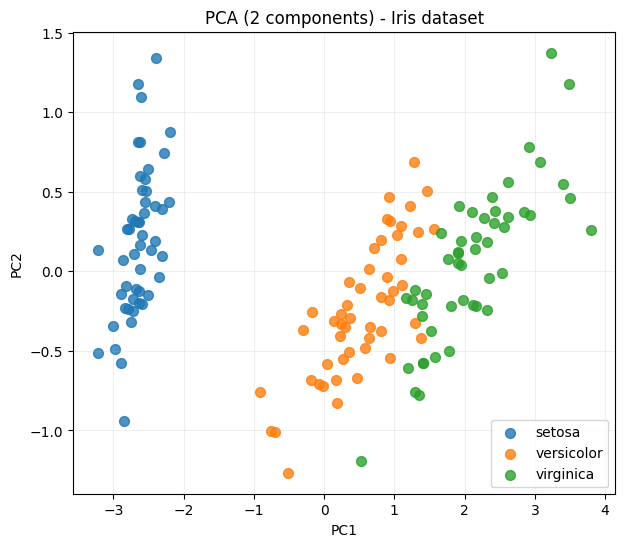

In [ ]:

# PCA to 2 components and scatter by species
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df[numeric_cols])

pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['target'] = df['target']
pca_df['target_name'] = df['target_name']

print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)

plt.figure(figsize=(7,6))
for target_idx, target_name in enumerate(target_names):
    subset = pca_df[pca_df['target'] == target_idx]
    plt.scatter(subset['PC1'], subset['PC2'], label=target_name, s=50, alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 components) - Iris dataset")
plt.legend()
plt.grid(alpha=0.2)
plt.show()
